# Tutorial 2 
## Sinai's billiard 

Text available in [this page](http://lptms.u-psud.fr/membres/groux/Test/CorrigeTD2.html#-Class-Session-2:-Two-dimensional-hard-spheres,the-Sinai%27s-billiard-). 

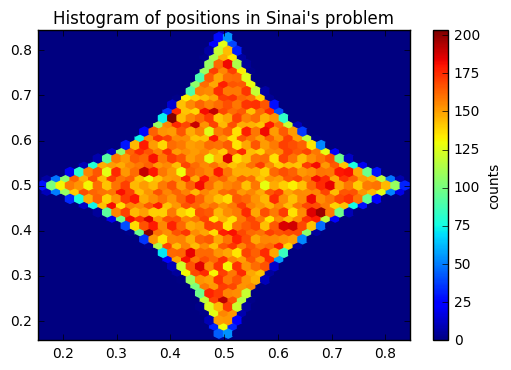

In [10]:
import numpy, math
from pylab import *
%matplotlib inline

def pair_time(x,vec,v):
    del_x = numpy.subtract(x,vec)
    dummy = numpy.dot(del_x,v)
    Upsilon = dummy**2 - (numpy.dot(del_x,del_x) - 4*sigma**2)
    if Upsilon > 0 and dummy < 0 :
        t_pair = - (dummy + sqrt(Upsilon))
    else:
        t_pair = 1.0e20  # stands for infinity
    return t_pair
sigma = 0.26
statistics = 400000
# initial conditions
x = numpy.array([0.5,0.65])
v = numpy.array([1.0,0.2])
corner = [[0,0],[1,0],[0,1],[1,1]]
t = 0.
last_corner = 0
x_bin = [x[0]]
y_bin = [x[1]]
for iter in range(statistics):
    next_time = [pair_time(x,vec,v) for vec in corner]
    t_1 = min(next_time)
    if t_1 > 1.e19:
        print "Lost collisions at time t:",t
        break
    corner_1 = corner[next_time.index(t_1)]
    if math.floor(t) != math.floor(t+t_1):
        dummy = x + v*(math.floor(t+t_1)-t)
        x_bin.append(dummy[0])
        y_bin.append(dummy[1])
#    dummy = x + v*(t_1)
#    x_bin.append(dummy[0])
#    y_bin.append(dummy[1])
    x +=  v*(t_1)
    t += t_1
    e_perp = numpy.subtract(corner_1,x)
    e_perp = e_perp/sqrt(dot(e_perp,e_perp))
    v -=  2*e_perp*numpy.dot(v,e_perp)
hexbin(x_bin,y_bin, gridsize=40)
#axis([0.,1.,0.,1.])
title("Histogram of positions in Sinai's problem")
cb = colorbar()
cb.set_label('counts')
show()



In [2]:
x1 = np.arange(9.0)

In [3]:
x1

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.])

In [4]:
x1.reshape(3,3)

array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.]])

In [5]:
x1

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.])

In [6]:
x1 = x1.reshape(3,3)
x2 = np.arange(3.0)

In [7]:
x2

array([ 0.,  1.,  2.])

In [8]:
x1-x2

array([[ 0.,  0.,  0.],
       [ 3.,  3.,  3.],
       [ 6.,  6.,  6.]])